In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from src.data.data_loader import audio_loader
from src.data.h5_loader import load_h5


In [2]:
y, sr = librosa.load(librosa.ex('trumpet'))

Text(0.5, 1.0, 'Áudio Trombeta')

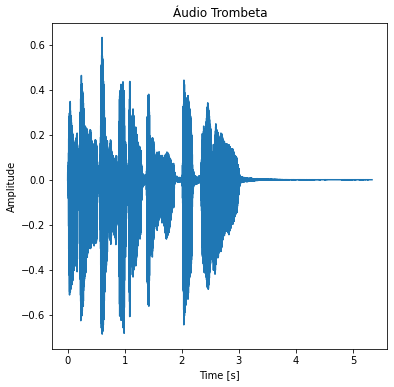

In [24]:
plt.figure(facecolor='xkcd:white',figsize=(6, 6))
num_samples = len(y)
time_vect = np.linspace(0, num_samples/sr, num_samples)
plt.plot(time_vect,y)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('Áudio Trombeta')

In [4]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

C:\Users\csant321\AppData\Local\Temp\ipykernel_22508\473892238.py:1: FutureWarning: Pass y=[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
c:\Users\csant321\Desktop\Projetos\tempo_estimation_emd\.venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


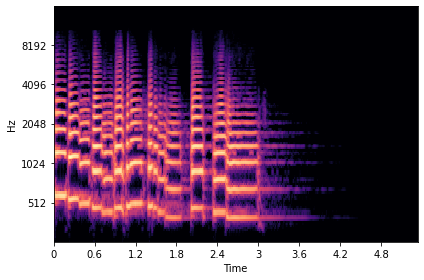

In [5]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [6]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

In [7]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

In [8]:
onset_sf

array([0.05487528, 0.24444444, 0.41904762, 0.60362812, 0.93287982,
       1.10249433, 1.41678005, 1.66621315, 2.04535147, 2.21995465,
       2.36961451, 2.55419501, 3.03310658])

(1070,)


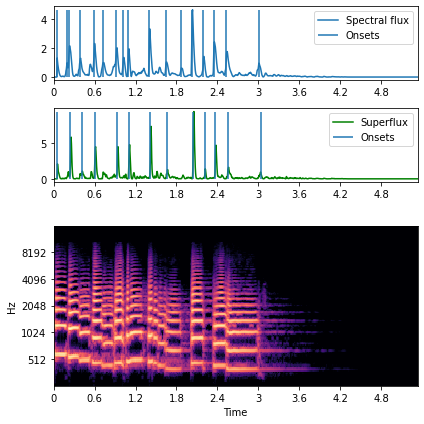

In [9]:
# sphinx_gallery_thumbnail_number = 2
plt.figure(facecolor='xkcd:white',figsize=(6, 6))

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

ax = plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.axis('tight')


plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.legend()


plt.subplot(4, 1, 2, sharex=ax)
plt.plot(frame_time, odf_sf, color='g', label='Superflux')

print(odf_sf.shape)
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
S = librosa.feature.melspectrogram(y=y, sr=sr)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

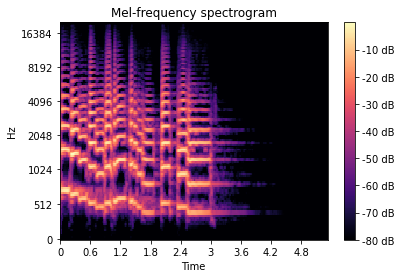

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=20000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [12]:
y_time = librosa.get_duration(y=y,sr=sr)
print(y_time)

f_odf = len(odf_sf)/y_time
print(f_odf)

spec_f = 230/y_time
print(spec_f)

5.333378684807256
200.6232940196087
43.12463329393458


(128, 230)
(1070,) 22050


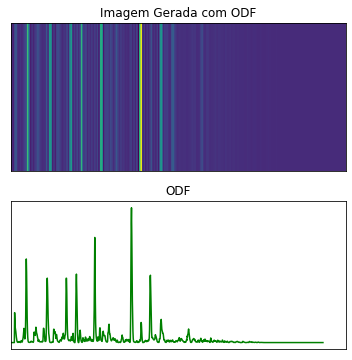

In [51]:
odf_sf_1 = odf_sf.reshape(1,-1)
odf_r = librosa.resample(odf_sf_1, orig_sr=f_odf, target_sr=spec_f)
odf_im = np.repeat(odf_r, 128,axis=0)
print(odf_im.shape)

plt.figure(facecolor='xkcd:white',figsize=(6, 6))
time_vect = np.linspace(0, 214, 1070)
print(odf_sf.shape, sr)
ax = plt.subplot(2, 1, 2)
plt.subplot(2, 1, 1,sharex=ax)
plt.imshow(odf_im, origin='lower')
plt.title('Imagem Gerada com ODF')
plt.xticks([])
plt.yticks([])
plt.axis('tight')

plt.subplot(2, 1, 2,sharex=ax)
plt.title('ODF')
plt.xticks([])
plt.yticks([])
plt.plot(time_vect,odf_sf, color='g', label='Superflux')


In [14]:
a = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(a, ref=np.max)

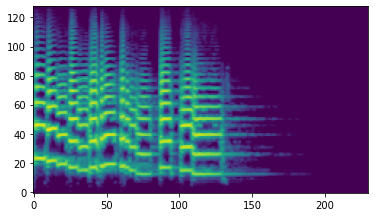

In [15]:
plt.imshow(S_dB, origin='lower')

In [16]:
from src.features.image_stack import ImageStack
imgstck = ImageStack(y=y,sr=sr)
image_stack = imgstck.create_image_stack()

In [17]:
image_stack.shape

(128, 230, 3)

In [18]:
aa = {'caleo':159}


In [119]:
X, sr = librosa.load(librosa.ex('trumpet'))
from src.features.upemd import UPEMD


imfs = UPEMD(num_imf=2).make_imfs(X).T

features = None
for i,imf in enumerate(imfs):
    imgs_stack = ImageStack(imf, sr=11_025).create_image_stack()
    
            
    if features is not None:
        features = np.dstack((features,imgs_stack))
    else:
        features = imgs_stack

In [120]:
features.shape

# fig, axs = plt.subplots(1, 6)

# for i,f in enumerate(features.T):
#     axs[i].imshow(f, origin='lower')



(128, 230, 6)

In [121]:
ff = np.moveaxis(features,-1,0)
print(ff.shape)

(6, 128, 230)


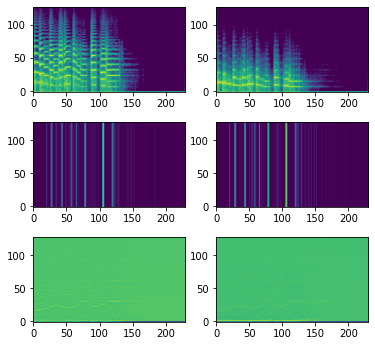

: 

In [137]:

fig, axs = plt.subplots(3, 2,facecolor='xkcd:white',figsize=(6, 6))

axs[0, 0].imshow(ff[0], origin='lower')
axs[0, 1].imshow(ff[3], origin='lower')

axs[1, 0].imshow(ff[1], origin='lower')
axs[1, 1].imshow(ff[4], origin='lower')

axs[2, 0].imshow(ff[2], origin='lower')
axs[2, 1].imshow(ff[5], origin='lower')

